In [1]:
sys.path.insert(0, './common')

import sys
import wave
import qlearning_target_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [12]:
env = wave.WaveEnv(env_path, timescale=30, worker_id=23)

WAVE environment created.


In [13]:
model = qlearning_target_model.QLearning(127, 2, 512)

In [14]:
save_path = './results/env01/qlearning_target/512-final-new-decay-more-new2'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


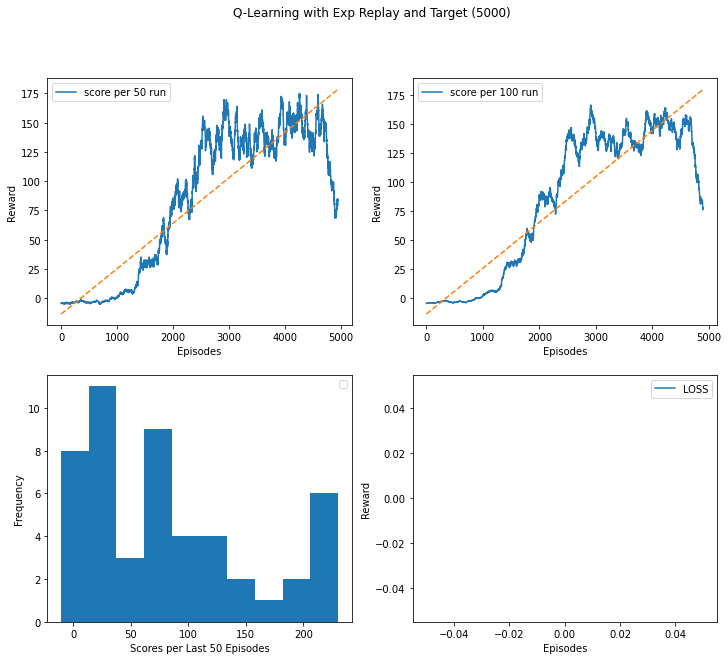

Model saved
Training history saved
saved to ./results/env01/qlearning_target/512-final-new-decay-more-new2
EPOCH: 4999, total reward: 5.109992980957031, timestep: 98, epsilon: 0.009998671593271896, lr: 1.350851717672993e-05


In [15]:
model.set_train_params(max_step=1000, batch_size=512, start_epsilon=1, mem_size=1_000_000, min_epsilon=0.01, lr_decay_interval=250)
model.train(env, 5000, show_plot=True)

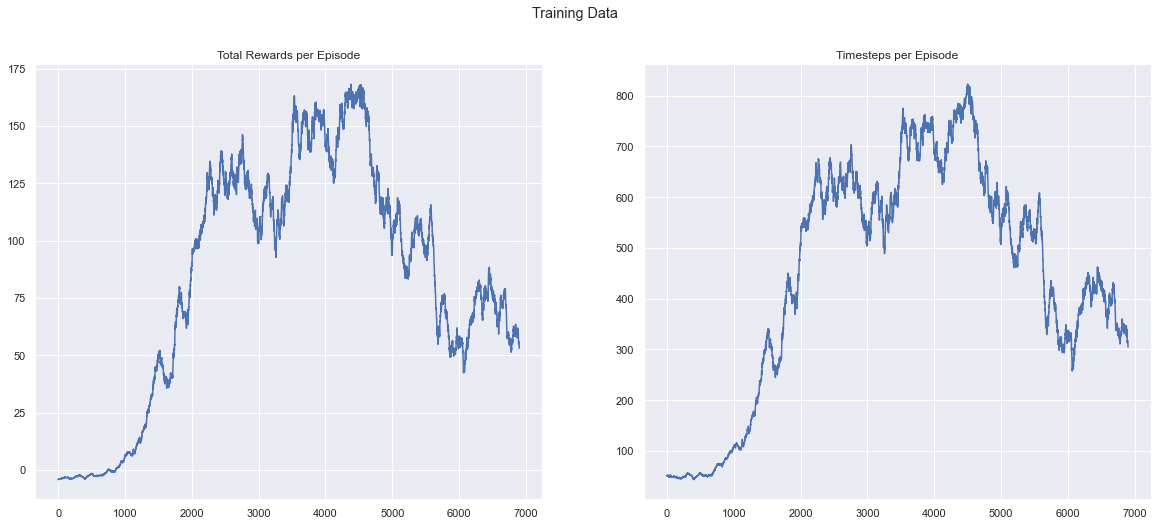

In [6]:
model.plot_train_memory(smooth=100)

In [8]:
model.save_model()

Model saved
Training history saved


In [ ]:
env = wave.WaveEnv(env_path, 1)
model.test(env)

In [8]:
model.test_avg(env, 10)

219.9999729692936 1000
143.5199784785509 630
-2.4500015676021576 149
149.83998115360737 704
59.24999526143074 315
48.729993507266045 326
142.37998078763485 753
224.99997325241566 1000
244.9999677091837 1000
140.73998376727104 586


([219.9999729692936,
  143.5199784785509,
  -2.4500015676021576,
  149.83998115360737,
  59.24999526143074,
  48.729993507266045,
  142.37998078763485,
  224.99997325241566,
  244.9999677091837,
  140.73998376727104],
 [1000, 630, 149, 704, 315, 326, 753, 1000, 1000, 586],
 137.20098253190517,
 646.3)

In [ ]:
# qlearning 10,000 episode (386.0179519353807, 1598.09)

In [19]:
env.close()